Drawing the magnetic lense for superfish input. 

In [124]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix' #For latex formatting
matplotlib.rcParams['font.family'] = 'STIXGeneral' #For latex formatting
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import statistics as sta
import seaborn as sns
import os
import shutil
from re import search
import skgeom as sg
from skgeom.draw import draw

In [125]:
#dir_new = r'C:\Users\kayanatm\Desktop\Astra Python simulations'
#folder_name = 'Magneic_lenses' #newr folder name
#os.mkdir(folder_name)
path = r'C:\Users\kayanatm\Desktop\Astra Python simulations\Python wrappers and reference files'
#path = os.path.join(path,folder_name)

The geoetry will be defined here, every measurement is in cm

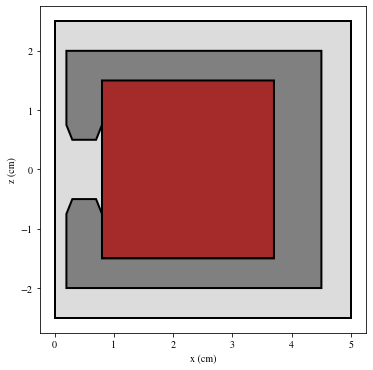

In [126]:
outer_points = [[0.2,2.0], [4.5,2.0],[4.5,-2.0], [0.2,-2.0],[0.2,-0.75],[0.3,-0.5], [0.7,-0.5],[0.8,-0.75], [0.8,-1.5] ,[3.7,-1.5], [3.7,1.5], [0.8,1.5],[0.8,0.75], [0.7,0.5],[0.3,0.5],[0.2,0.75]]
inner_points = [[0.8,1.5],[3.7,1.5],[3.7,-1.5],[0.8,-1.5]]
grid_for_poisson = [[0,2.5],[5,2.5],[5,-2.5],[0,-2.5]]

outer = sg.Polygon(outer_points)
inner = sg.Polygon(inner_points)
grid = sg.Polygon(grid_for_poisson)

plt.figure(figsize=(6,6))
draw(grid, facecolor = 'gainsboro')
draw(inner,facecolor = 'brown')
draw(outer,facecolor = 'grey')
plt.xlabel('x (cm)');
plt.ylabel('z (cm)');

In [127]:
header = "Permanent-Magnet Solenoid (for PANDIRA)\nOriginally appeared in 1987 Reference Manual B.12.3\n\n; Copyright 1987,\
by the University of California.\n; Unauthorized commercial use is prohibited.\n\
\n\
&reg kprob = 0,\n\
 icylin    = 1,\n\
 mode      = 0,\n\
 dx        = 0.010, dy = 0.010,\n\
 ! xjfact    = 0,\n\
 ! nbslf     = 1,\n\
 nbslo     = 0,\n\
 ktop      = 1, lmin =1, ltop = 40 &\n\
 \n"
print(header)

Permanent-Magnet Solenoid (for PANDIRA)
Originally appeared in 1987 Reference Manual B.12.3

; Copyright 1987,by the University of California.
; Unauthorized commercial use is prohibited.

&reg kprob = 0,
 icylin    = 1,
 mode      = 0,
 dx        = 0.010, dy = 0.010,
 ! xjfact    = 0,
 ! nbslf     = 1,
 nbslo     = 0,
 ktop      = 1, lmin =1, ltop = 40 &
 



In [128]:
text = "&po x = {:.2f}, y = {:.2f} &"+'\n'
grid_for_poisson.reverse()
outer_points.reverse()
inner_points.reverse()
print(grid_for_poisson)

[[0, -2.5], [5, -2.5], [5, 2.5], [0, 2.5]]


In [129]:
for x in grid_for_poisson:
    print(text.format(x[0],x[1]))
print(text.format(grid_for_poisson[0][0], grid_for_poisson[0][1]))

&po x = 0.00, y = -2.50 &

&po x = 5.00, y = -2.50 &

&po x = 5.00, y = 2.50 &

&po x = 0.00, y = 2.50 &

&po x = 0.00, y = -2.50 &



In [130]:
Imax = 1.25 # [A] expected current, Guenther had 1.25 A
windings= 1800  # windings of the coil
current = windings*Imax; # 900 [A] 

Witing the input file for the superfish to claculate the fields

In [131]:
magfile_name = os.path.join(path,'1cm_bore'+".am")
magfile = open(magfile_name,"w")
#Header
magfile.write(header)
#Grid
for x in grid_for_poisson:
    magfile.write(text.format(x[0],x[1]))
magfile.write(text.format(grid_for_poisson[0][0], grid_for_poisson[0][1]))
magfile.write('\n'+'\n')
#Inner material
text_mat_2 = "&reg mat = 1, current = {:.2f} &"
magfile.write(text_mat_2.format(current)+'\n')
for x in inner_points:
    magfile.write(text.format(x[0],x[1]))
magfile.write(text.format(inner_points[0][0], inner_points[0][1]))
magfile.write('\n'+'\n')
#outer material
magfile.write('&reg mat = 2 &'+'\n')
for x in outer_points:
    magfile.write(text.format(x[0],x[1]))
magfile.write(text.format(outer_points[0][0],outer_points[0][1]))

magfile.close()
#print(files_i)